In [2]:
import sys
import os
sys.path.append("/home/nakamura/network_dissection/NetDissect/src")
os.chdir("/home/nakamura/network_dissection/NetDissect/")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn

from viewprobe import NetworkProbe
from category_info import category_info
script = "/home/nakamura/network_dissection/NetDissect/research/top_iou_detected_ratio_1227.ipynb"
% matplotlib inline

In [3]:
# define models
alex = {}
alex["name"] = "alexnet_imagenet"
alex["directory"] = "./dissection/alexnet_imagenet_full_conv_384/"
alex["blobs"] = ["conv1", "conv2", "conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

vgg_material = {}
vgg_material["name"] = "vgg_material"
vgg_material["directory"] = "./dissection/vgg_material_full_conv/"
vgg_material["blobs"] = ["conv1_2", "conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

sentibank = {}
sentibank["name"] = "sentibank"
sentibank["directory"] = "./dissection/caffe_sentibank_full_conv/"
sentibank["blobs"] = ["conv1", "conv2","conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

vgg_face = {}
vgg_face["name"] = "vgg_face"
vgg_face["directory"] = "./dissection/VGG_FACE_full_conv/"
vgg_face["blobs"] = ["conv1_2", "conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

models = [alex, vgg_material, sentibank, vgg_face]

In [4]:
def n_detec(model, blob, threshold=0.05):
    """return ordered_iou averaged in a layer as pandas.Series"""
    
    path= os.path.join(model["directory"], blob + "-iou.csv")
    iou = pd.read_csv(path, index_col=0)
    iou_threshold = iou > threshold
    num_detec = iou_threshold.mean(axis=0)
    
    return num_detec

In [62]:
n_alex = n_detec(alex, "fc7-conv")
n_vgg = n_detec(vgg_material, "fc7-conv")

ratio = n_vgg / n_alex
ratio = ratio[ratio > 1]
fc7_ = set(ratio.index.tolist())
ratio.sort_values(ascending=False).head(200)

fort-s                               inf
courtroom-s                          inf
fairway-s                            inf
cubicle-office-s                     inf
computer_room-s                      inf
water_tower-s                        inf
music_studio-s                       inf
weighbridge-s                        inf
waterfall-fan-s                      inf
windmill-s                           inf
sauna-s                              inf
bathroom-s                           inf
runway-s                             inf
aqueduct-s                           inf
islet-s                              inf
corn_field-s                         inf
auto_factory-s                       inf
martial_arts_gym-s                   inf
rope_bridge-s                        inf
seat                                 inf
corral-s                             inf
flower                               inf
toyshop-s                            inf
amusement_arcade-s                   inf
home_theater-s  

In [63]:
n_alex = n_detec(alex, "fc6-conv")
n_vgg = n_detec(vgg_material, "fc6-conv")

ratio = n_vgg / n_alex
ratio = ratio[ratio > 1]
fc6_ = set(ratio.index.tolist())
ratio.sort_values(ascending=False).head(50)

fort-s                      inf
game_room-s                 inf
forest-broadleaf-s          inf
coast-s                     inf
beach-s                     inf
house-s                     inf
lighthouse-s                inf
shoe_shop-s                 inf
bank_vault-s                inf
lake-natural-s              inf
tower-s                     inf
arrival_gate-outdoor-s      inf
utility_room-s              inf
controls                    inf
greenhouse-indoor-s         inf
subway_interior-s           inf
landing_deck-s              inf
archive-s                   inf
waterfall-block-s           inf
home_theater-s              inf
amusement_arcade-s          inf
poolroom-establishment-s    inf
auto_showroom-s             inf
washer                      inf
airport_terminal-s          inf
bow_window-outdoor-s        inf
pleated                     inf
sofa                        inf
bottle                      inf
screen                      inf
boat                        inf
living_r

In [43]:
n_alex = n_detec(alex, "conv5")
n_vgg = n_detec(vgg_material, "conv5_3")

ratio = n_alex / n_vgg
ratio  = ratio[ratio > 1.0]
conv5_ = set(ratio.index.tolist())
print(ratio.sort_values(ascending=False))

beach-s                  inf
lined                    inf
road                     inf
banded                   inf
porous                   inf
mountain_snowy-s         inf
grooved                  inf
zigzagged           8.000000
tree                6.000000
chequered           5.000000
spiralled           4.000000
red-c               4.000000
grass               3.000000
coast-s             2.000000
perforated          2.000000
sea                 2.000000
sprinkled           2.000000
sky                 2.000000
dotted              1.600000
meshed              1.500000
polka-dotted        1.333333
cobwebbed           1.333333
striped             1.200000
bicycle             1.200000
dtype: float64


In [58]:
concepts_ = conv5_

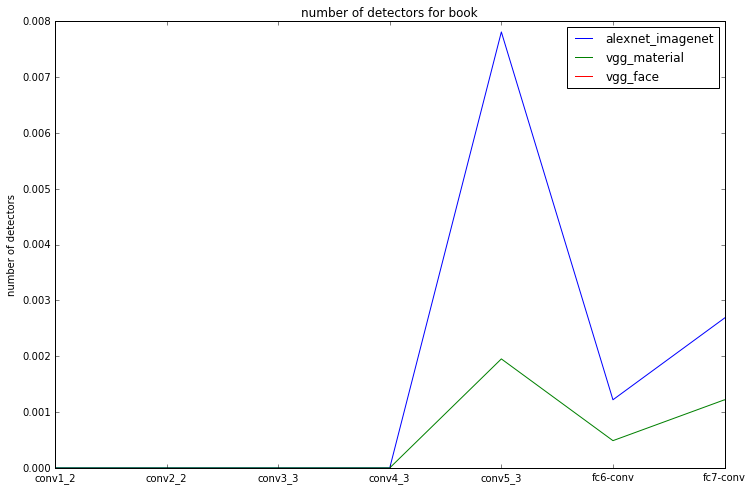

In [57]:
models = [alex, vgg_material, vgg_face]

result={}

concept = "book"
result[concept] = {}
fig, ax = plt.subplots(figsize=(12,8))
for model in models:
    n_detec_list = n_detec_summary(model, concept)
    result[concept][model["name"]] = n_detec_list
    ax.plot(n_detec_list, label=model["name"])
    ax.set_xlim(0,6)
ax.set_xticklabels(vgg_material["blobs"])
ax.legend(loc="best")
ax.set_ylabel("number of detectors")
ax.set_title("number of detectors for {}".format(concept))
plt.show()

In [15]:
result

{'road': {'alexnet_imagenet': [0.0,
   0.0,
   0.0,
   0.0,
   0.00390625,
   0.00390625,
   0.010009765625,
   0.023],
  'vgg_face': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0],
  'vgg_material': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000244140625, 0.0]}}

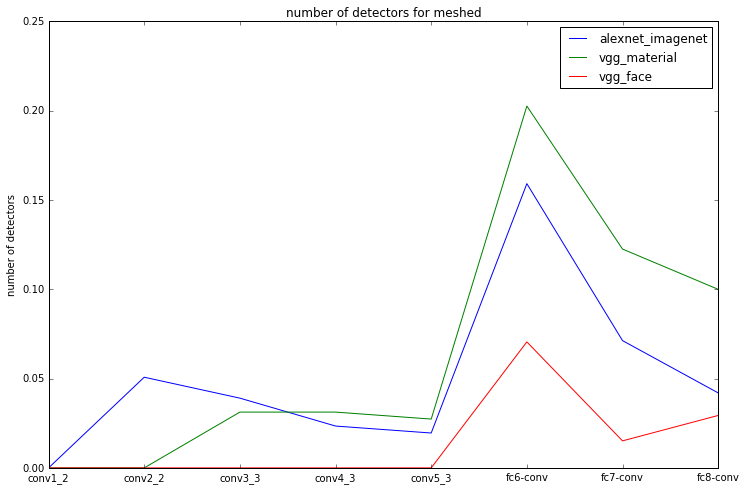

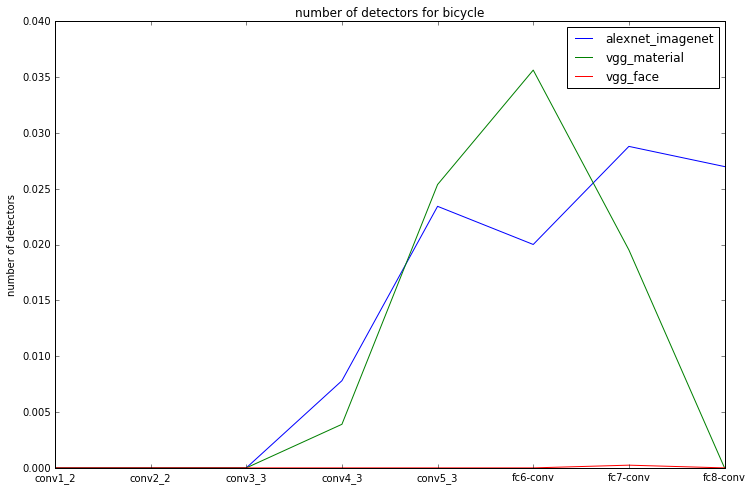

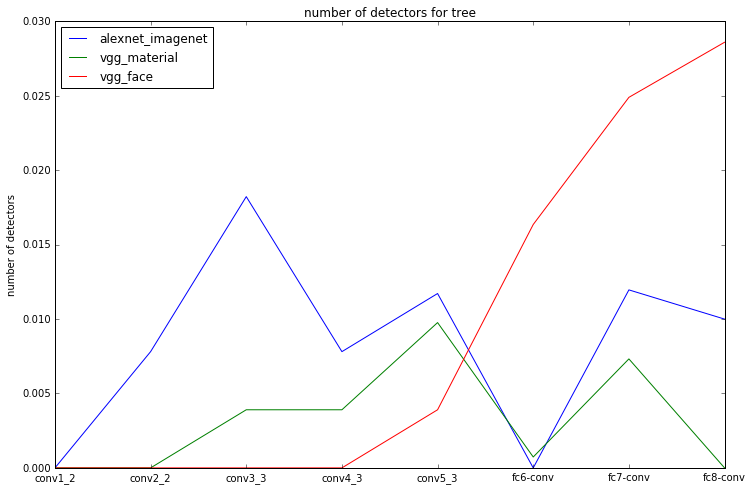

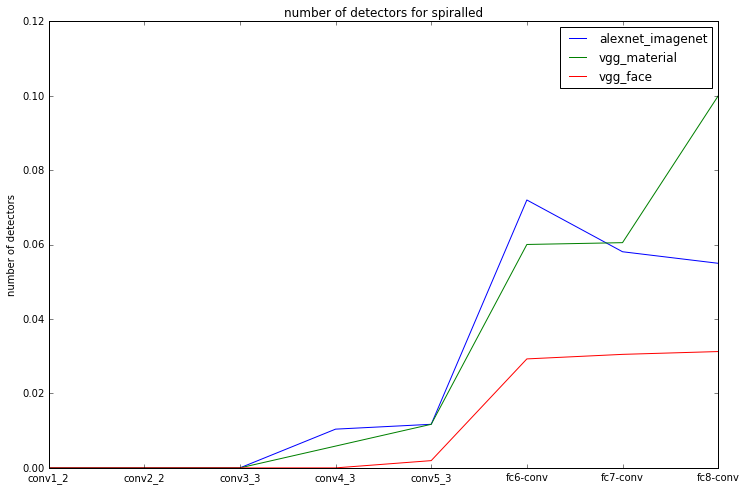

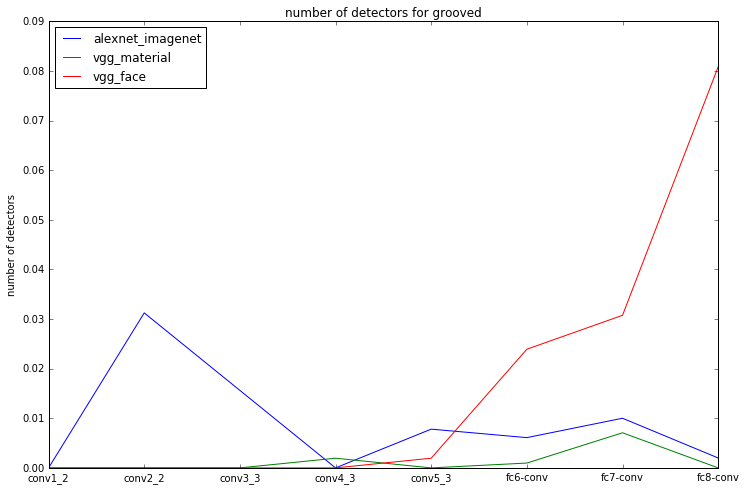

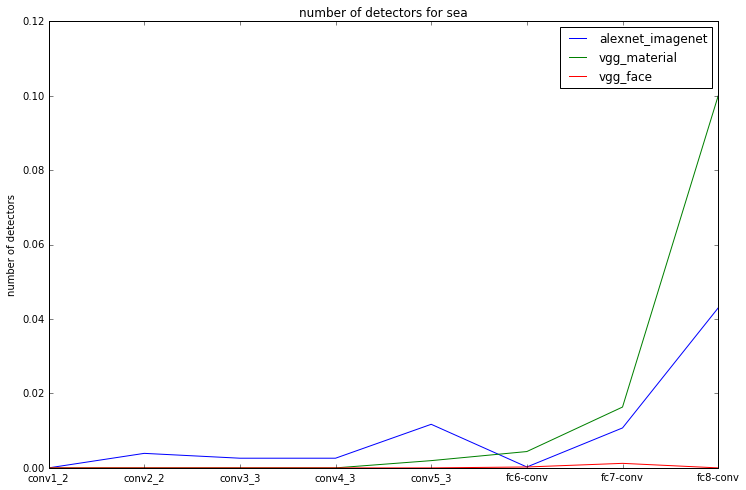

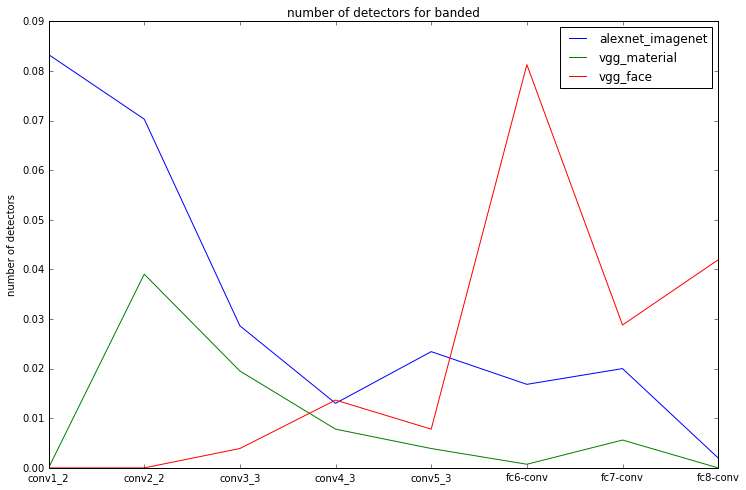

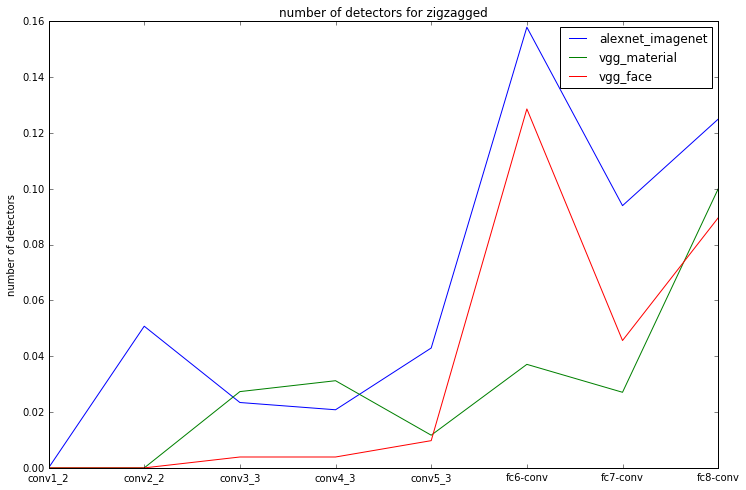

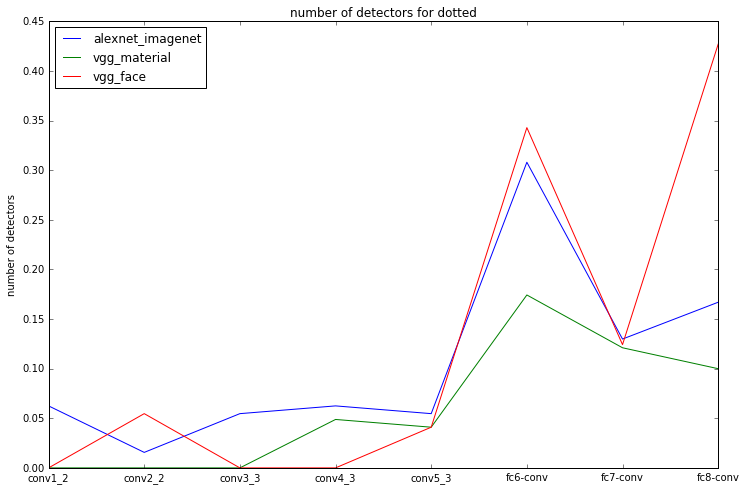

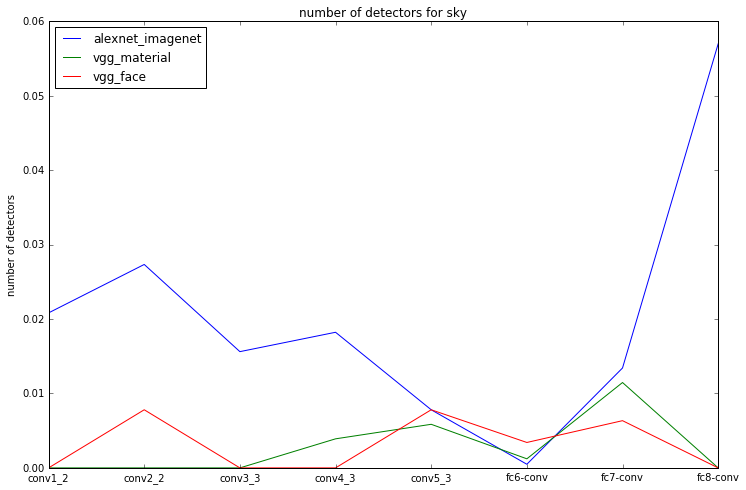

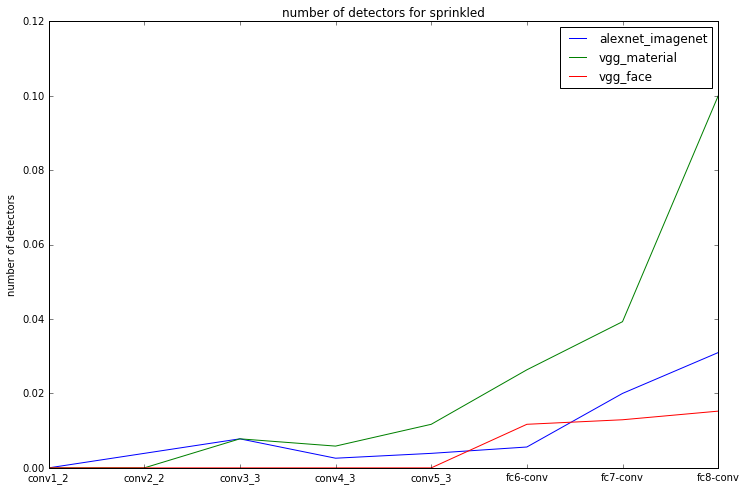

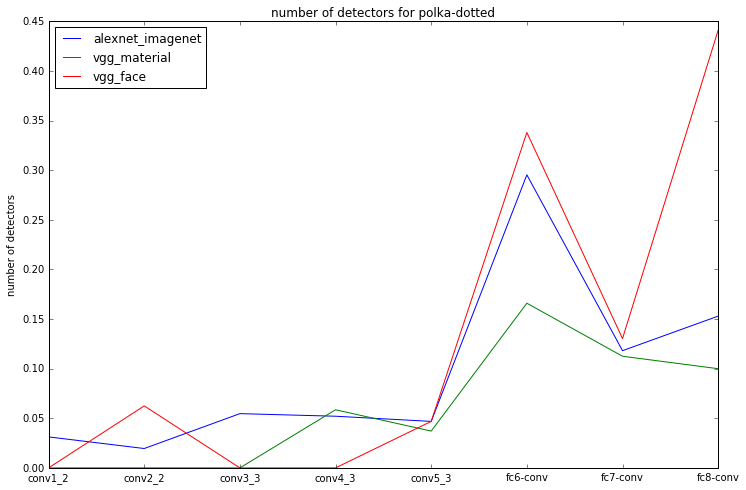

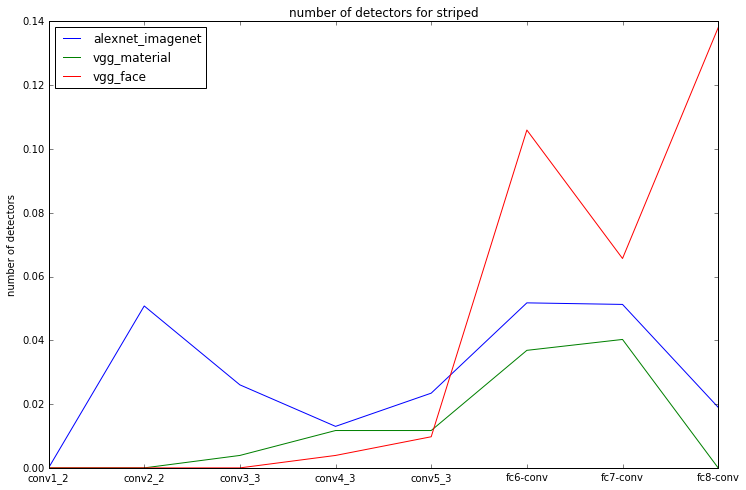

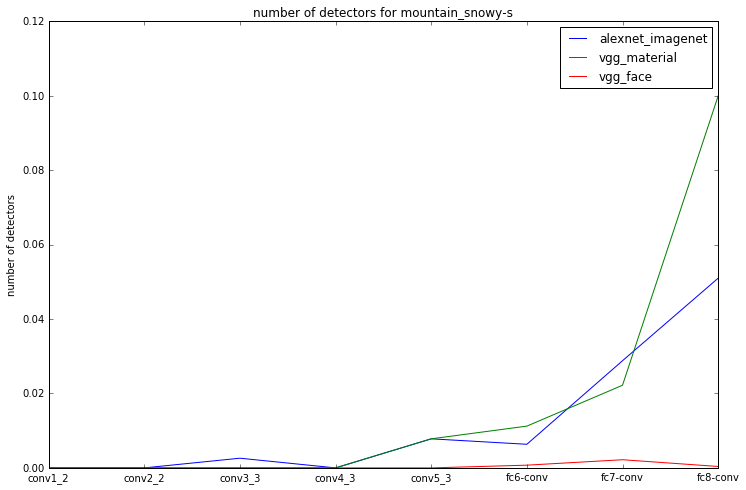

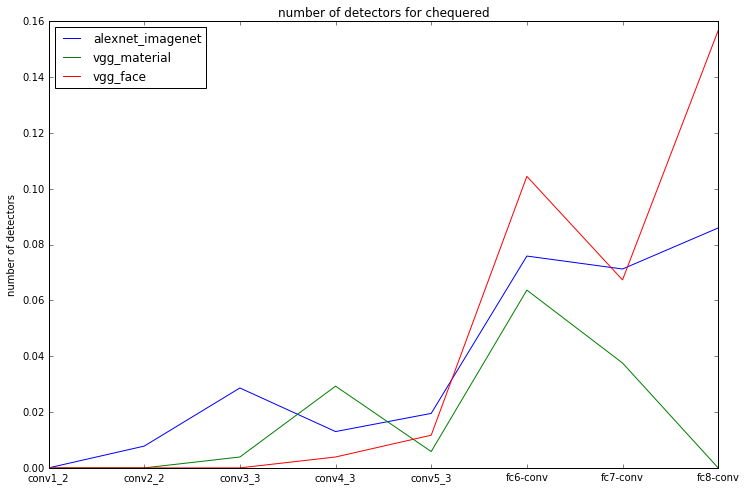

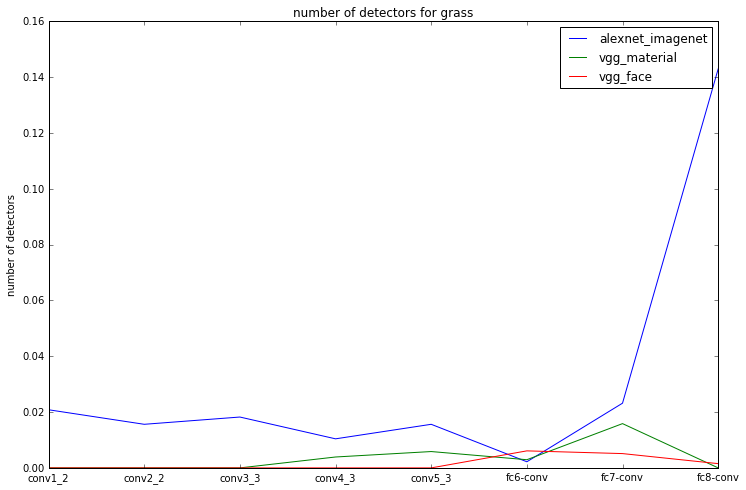

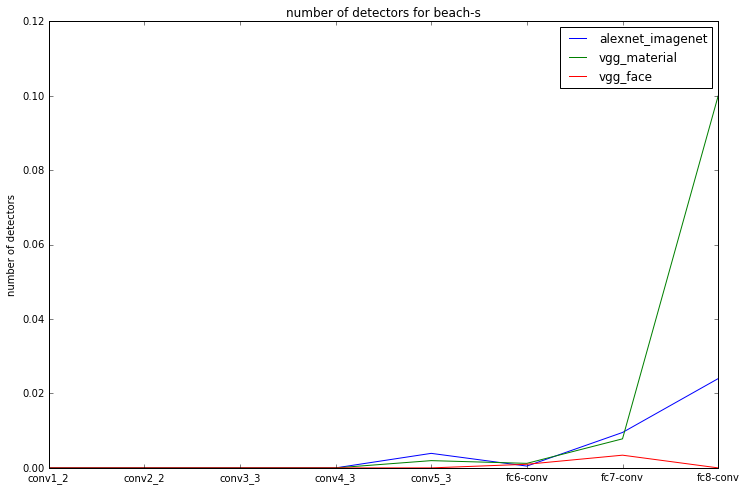

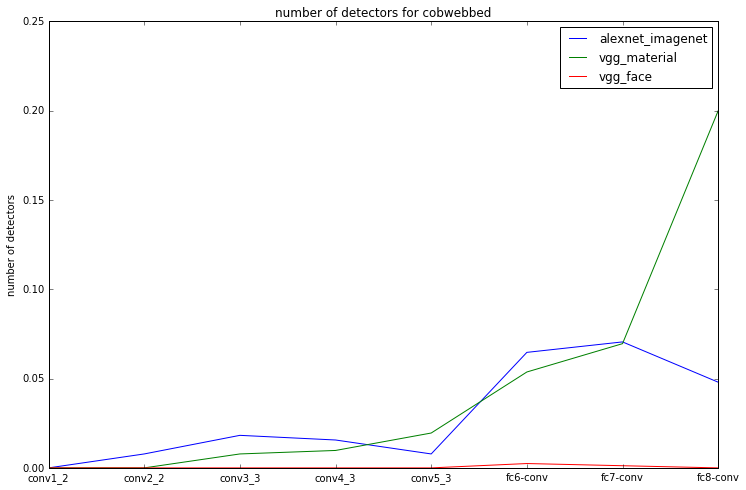

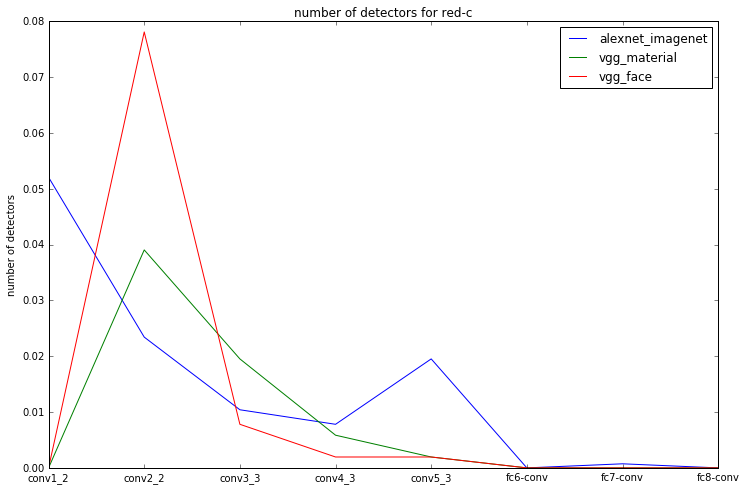

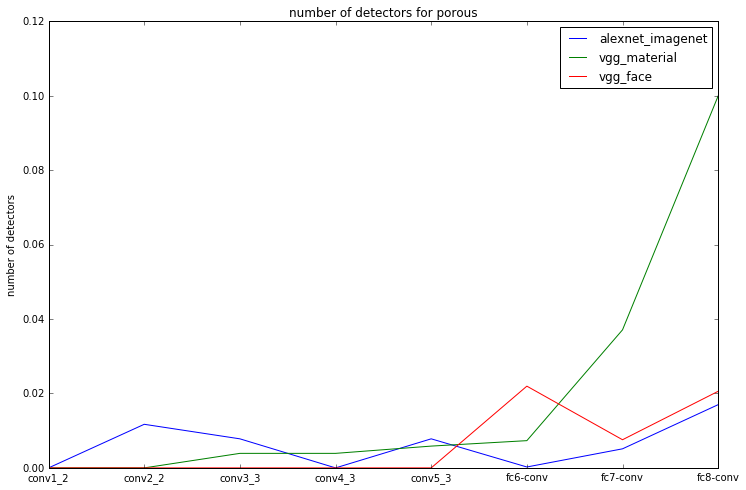

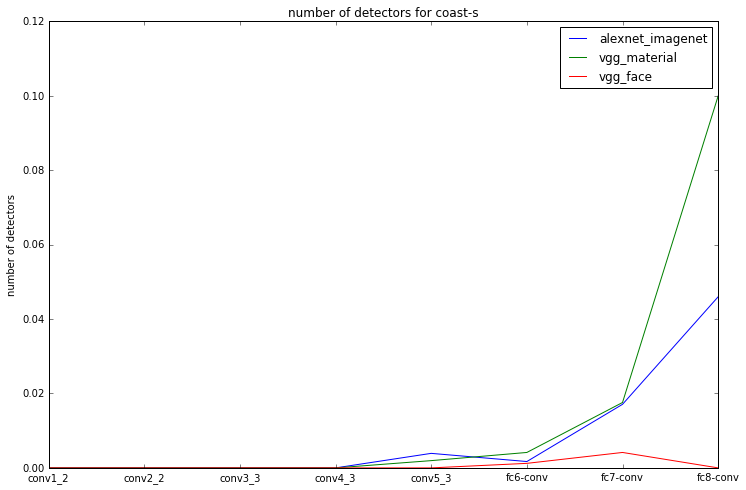

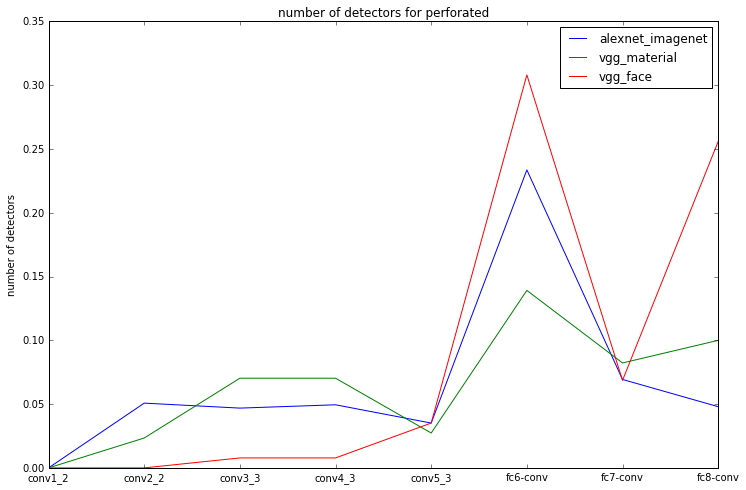

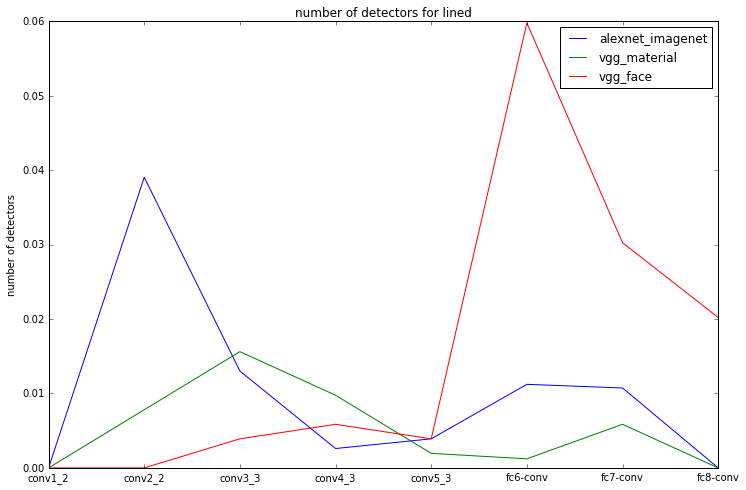

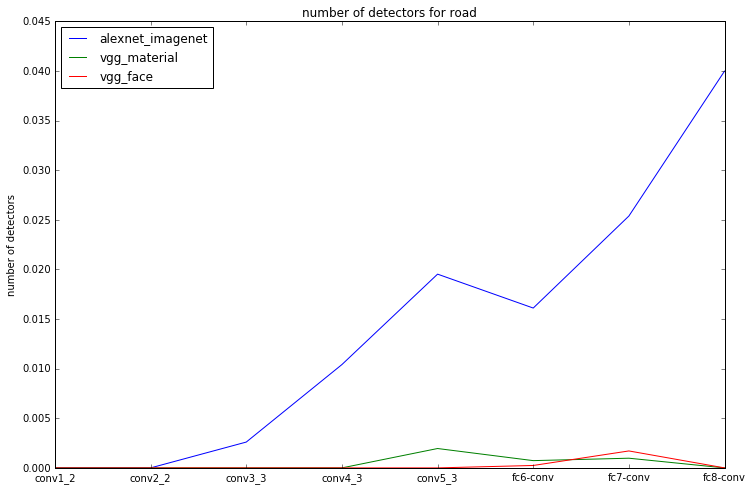

In [59]:
models = [alex, vgg_material, vgg_face]
concepts = ["dog", "cat", "bicycle", "grass", "water", "lacelike", "waterfall-fan-s", "head", "hair"]
result={}

for concept in concepts_:
    result[concept] = {}
    fig, ax = plt.subplots(figsize=(12,8))
    for model in models:
        n_detec_list = n_detec_summary(model, concept)
        result[concept][model["name"]] = n_detec_list
        ax.plot(n_detec_list, label=model["name"])

    ax.set_xticklabels(vgg_material["blobs"])
    ax.legend(loc="best")
    ax.set_ylabel("number of detectors")
    ax.set_title("number of detectors for {}".format(concept))
    plt.show()

In [55]:
def plot():    
    models = [alex, vgg_material, vgg_face]
    concepts = ["dog", "cat", "bicycle", "grass", "water", "lacelike", "waterfall-fan-s", "head", "hair"]
    result={}

    for concept in concepts_:
        result[concept] = {}
        fig, ax = plt.subplots(figsize=(12,8))
        ax.set_xlim(0, 6)
        for model in models:
            n_detec_list = n_detec_summary(model, concept)
            result[concept][model["name"]] = n_detec_list
            ax.plot(n_detec_list, label=model["name"])

        ax.set_xticklabels(vgg_material["blobs"])
        ax.legend(loc="best")
        ax.set_ylabel("number of detectors")
        ax.set_title("number of detectors for {}".format(concept))
        plt.show()